In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
enron_emails = pd.read_csv("/kaggle/input/enron-email-dataset/emails.csv")
enron_emails.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


## Parsing message content to extract relevant fields

**Below is an example message**

In [3]:
print(enron_emails['message'][250_000])

Message-ID: <18899187.1075855427615.JavaMail.evans@thyme>
Date: Tue, 21 Aug 2001 14:57:01 -0700 (PDT)
From: 40enron@enron.com
Subject: Formation of Enron Management Committee
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Ken Lay-@ENRON <IMCEANOTES-Ken+20Lay-+40ENRON@ENRON.com>
X-To: All Enron Worldwide@ENRON <??SAll Enron Worldwide@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Steven_Kean_Jan2002\Kean, Steven J.\organization
X-Origin: Kean-S
X-FileName: skean (Non-Privileged).pst


I am pleased to announce the formation of the Enron Management Committee.  The Management Committee comprises our business unit and function leadership and will focus on the key management, strategy, and policy issues facing Enron.  The Management Committee will supplant the former Policy Committee and will include the following individuals:

Ken Lay - Chairman and CEO, Enron Corp.
Ray Bowen - COO, Enron Industrial Markets
Michael Brown - COO, Enron Europe
Rick Buy -

In [4]:
import email

#the message is in string format, so the email lib will parse it and then form the Email object which has all the parts of a typical Email.
messages = enron_emails['message'].apply(lambda x : email.message_from_string(x))

#check the message and the key-value pairs(parts) that were extracted from the messages
print(messages[200_000])
print(messages[200_000].items())

Message-ID: <18454935.1075856550277.JavaMail.evans@thyme>
Date: Thu, 14 Sep 2000 10:15:00 -0700 (PDT)
From: vince.kaminski@enron.com
To: vkaminski@aol.com
Subject: Update on UT - Enron Activities: My Conversation with Rick Causey
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Vince J Kaminski
X-To: vkaminski@aol.com
X-cc: 
X-bcc: 
X-Folder: \Vincent_Kaminski_Jun2001_4\Notes Folders\'sent mail
X-Origin: Kaminski-V
X-FileName: vkamins.nsf

---------------------- Forwarded by Vince J Kaminski/HOU/ECT on 09/14/2000 
05:21 PM ---------------------------


"Ehud I. Ronn" <eronn@mail.utexas.edu> on 09/14/2000 10:15:33 AM
To: vkamins@enron.com
cc:  
Subject: Update on UT - Enron Activities: My Conversation with Rick Causey


Vince,

Good morning.

As you may know, last Thur. Enron honored this year's recipients of the
Enron MBA Excellence Fund Scholars at a dinner in Austin.  In addition to
the three recipients, Business School Dean May and

**okay so the content is missing from the parsed results of the emails, have to do it manually.**

In [5]:
fields = messages[0].keys()

#create columns in the dataframe with equivalent names of the parts extracted from the messages
for field in fields:
    enron_emails[field] = [message[field] for message in messages]
    
enron_emails.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf


In [6]:
def get_message_body(message):
    parts = []
    for part in message.walk():
        if(part.get_content_type() == 'text/plain'):
            parts.append(part.get_payload())
    return ''.join(parts)

#we want only that part of the message which is 'text/plain' type to find the message body.
enron_emails['content'] = messages.apply(lambda x : get_message_body(x))
enron_emails.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.


In [7]:
#this is for those messages where there are multiple emails involved in sender side or receiver side
def split_email_addresses(line):
    if line:
        addrs = line.split(',')
        addrs = tuple(x.strip() for x in addrs)
    else:
        addrs = None
    return addrs

enron_emails['From'] = enron_emails['From'].map(split_email_addresses)
enron_emails['To'] = enron_emails['To'].map(split_email_addresses)

enron_emails = enron_emails[['From', 'To', 'Date', 'Subject', 'content', 'message']]
enron_emails.head()

,From,To,Date,Subject,content,message
0,"(phillip.allen@enron.com,)","(tim.belden@enron.com,)","Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Here is our forecast\n\n,Message-ID: <18782981.1075855378110.JavaMail.e...
1,"(phillip.allen@enron.com,)","(john.lavorato@enron.com,)","Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,Traveling to have a business meeting takes the...,Message-ID: <15464986.1075855378456.JavaMail.e...
2,"(phillip.allen@enron.com,)","(leah.arsdall@enron.com,)","Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,test successful. way to go!!!,Message-ID: <24216240.1075855687451.JavaMail.e...
3,"(phillip.allen@enron.com,)","(randall.gay@enron.com,)","Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,"Randy,\n\n Can you send me a schedule of the s...",Message-ID: <13505866.1075863688222.JavaMail.e...
4,"(phillip.allen@enron.com,)","(greg.piper@enron.com,)","Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,Let's shoot for Tuesday at 11:45.,Message-ID: <30922949.1075863688243.JavaMail.e...


## Forming Polarity of the emails

In [8]:
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
from textblob import TextBlob
import psutil

#forming polarity for each email sequentially is time taking, so I thought to multiprocess my way through.
def collate_fn(batch):
    return batch

class ContentLoader(Dataset):
    def __init__(self, content):
        super(ContentLoader, self).__init__()
        self.content = content.reset_index(drop = True)

    def __len__(self):
        return len(self.content)

    def __getitem__(self, idx):
        return TextBlob(str(self.content[idx])).sentiment.polarity


dataset = ContentLoader(enron_emails['content'])
dataloader = DataLoader(dataset, batch_size = 500, shuffle = False, num_workers = psutil.cpu_count(), collate_fn = collate_fn)

polarities = []
for batch in tqdm(dataloader, desc = "forming polarities", total = len(dataloader)):
    polarities.extend(batch)

enron_emails['Polarity'] = pd.Series(polarities)

forming polarities:   0%|          | 0/1035 [00:00<?, ?it/s]

## Content level features

In [9]:
enron_emails['hiding_keyword_count'] = enron_emails['content'].str.count(r'(?i)\b(delete|hide|hidden|remove|removal|erase|redact|eliminate|dispose|conceal|classified|confidential)\b')
enron_emails['urgent_keyword_count'] = enron_emails['content'].str.count(r'(?i)\b(urgent|meeting|compromise|jeopardy|sensitive|critical|crucial|immediate|threat)\b')
enron_emails['fin_keyword_count'] = enron_emails['content'].str.count(r'(?i)\b(loss|debt|default|deficit|delinquent|delinquency|risk)\b')
enron_emails['question_count'] = enron_emails['content'].str.count(r'\?')

In [10]:
#exploding the 'From' and 'To' columns, so that whichever row has multiple emails in 'From' or 'To' section, 
#will get exploded to have all valid combinations as rows of single 'From' and 'To' email ids.

print(f"Before exploding {enron_emails.shape}")
enron_emails = enron_emails.explode(['From']).explode(['To'])
print(f"After exploding {enron_emails.shape}")
enron_emails.head()

Before exploding (517401, 11)
After exploding (3152119, 11)


,From,To,Date,Subject,content,message,Polarity,hiding_keyword_count,urgent_keyword_count,fin_keyword_count,question_count
0,phillip.allen@enron.com,tim.belden@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Here is our forecast\n\n,Message-ID: <18782981.1075855378110.JavaMail.e...,0.000000,0,0,0,0
1,phillip.allen@enron.com,john.lavorato@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,Traveling to have a business meeting takes the...,Message-ID: <15464986.1075855378456.JavaMail.e...,0.181818,0,1,0,0
2,phillip.allen@enron.com,leah.arsdall@enron.com,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,test successful. way to go!!!,Message-ID: <24216240.1075855687451.JavaMail.e...,1.000000,0,0,0,0
3,phillip.allen@enron.com,randall.gay@enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,"Randy,\n\n Can you send me a schedule of the s...",Message-ID: <13505866.1075863688222.JavaMail.e...,0.000000,0,0,0,0
4,phillip.allen@enron.com,greg.piper@enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,Let's shoot for Tuesday at 11:45.,Message-ID: <30922949.1075863688243.JavaMail.e...,0.000000,0,0,0,0


## Removing non-human enron email ***(pete.davis@enron.com)***

***emails sent by pete.davis@enron.com were non-human generated***

In [11]:
enron_emails = enron_emails[enron_emails['From'] != 'pete.davis@enron.com'].reset_index(drop = True)

#also removing those conversations which refer themselves
enron_emails = enron_emails[enron_emails['From'] != enron_emails['To']].reset_index(drop = True)

## Inspecting non-enron Email Ids

In [12]:
#what are the email ids that are not corresponding to the enron domain all about ?

non_enron_emails = []

for x in list(set(enron_emails['From'].unique().tolist() + enron_emails['To'].unique().tolist())):
    if(x is not None and 'enron' not in  x):
        non_enron_emails.append(x)
        
non_enron_emails = sorted(non_enron_emails)

In [13]:
#now we try to see what the domain names of non-enron emails are, to get more insights.
exceptions = []
domains = []

for email in non_enron_emails:
    try:
        domain = email.split('@')[1] #get the domain, e.g: 'gmail.com', 'xyz.edu'
        domain, tld = domain.rsplit('.', 1) #e.g: (gmail, com), (wiki, org), (stanford, edu)
        
        #tld is the top level domain, we are checking here if the top level domain is purely alphabetic
        if(tld.isalpha()):
            domains.append(domain)
        else:
            exceptions.append(email)
    except:
        exceptions.append(email)

domains = pd.Series(domains)

# Inspecting non Enron domains

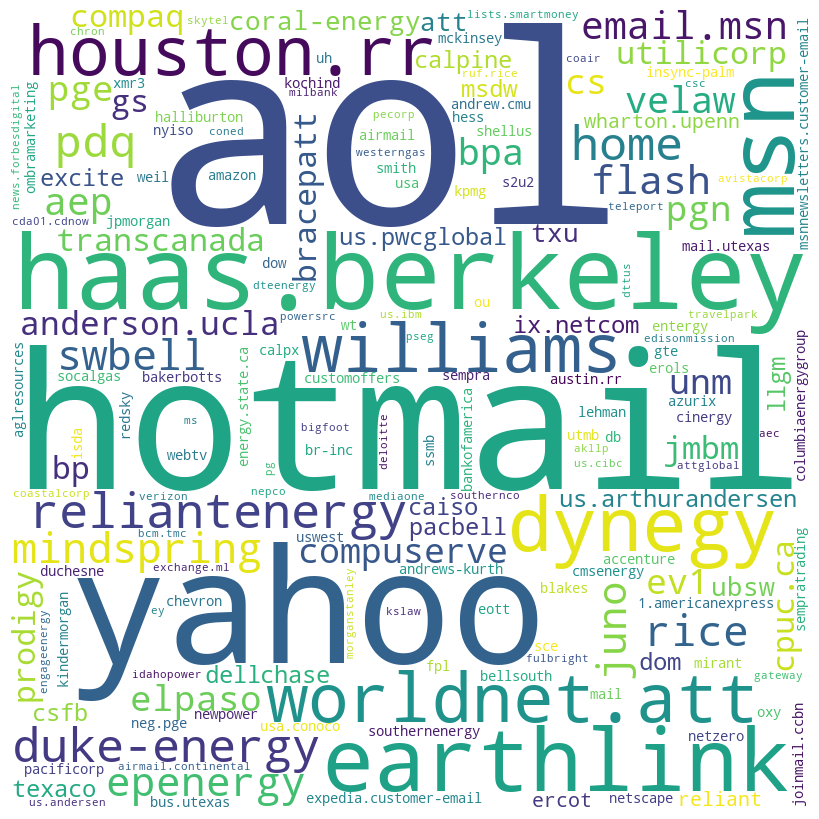

In [14]:
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(
    width = 800, height = 800,
    background_color ='white',
    stopwords = None,
    min_font_size = 10
).generate_from_frequencies(domains.value_counts().to_dict())

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

***The above figure shows the word cloud for non-Enron domains. The size of the domain in the picture
is proportional to its frequency of occurence in the dataset.***

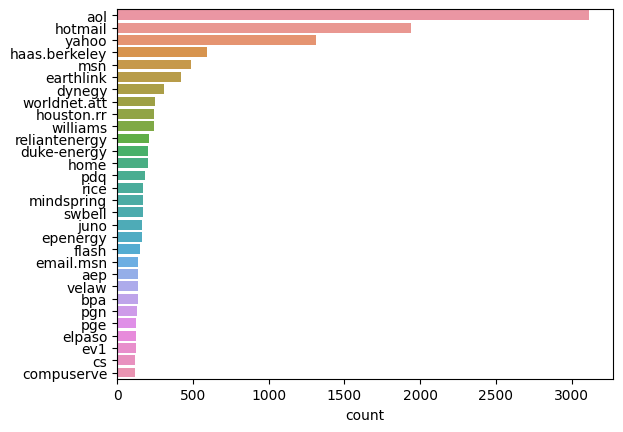

In [15]:
ax = sns.barplot(y = domains.value_counts().index[:30], x = domains.value_counts()[:30], orientation = 'horizontal')

***The above are the top-30 non-Enron domains from the dataset plotted on a barplot.***

## Inspecting exception Emails

In [16]:
print(exceptions)

['a <international.>', 'blasts@216.173.29.238', 'cats <breaktkhrough.>', 'contract <jeff>', 'deblasid@tcplink.nrel.gove-mail', 'dogs <breakthrough.>', 'dsmirin@earthlink.net.245-2240', 'e-mail <.pat>', 'e-mail <anthony.>', 'e-mail <brian.>', 'e-mail <dave.>', 'e-mail <gretchen.>', 'e-mail <kyle.>', 'e-mail <mari.>', 'e-mail <roger.>', 'e-mail <sy.>', 'east <7..>', 'f62489 <g>', 'football <kiske.chris>', 'jt9@mops.opa-row', 'judso.sesto.ca@mops.opa-row', 'lasts@216.173.29.238', 'leaders <breaktkhrough.>', 'nepco <patrick.>', 'office <bailey>', 'pep <performance.>', 'risk <breakthrough.>', 'rsherman@epri.com.245-2240', 'w/assts <govt.>', 'z34655 <m>']


**choosing to omit exception email conversations for now, will include them later if I can think of something.**

In [17]:
exceptions = list(set(exceptions))

#removing those conversations where To is NULL, however NULL value in 'To' column here can be treated as a single entity/e-mail address(plan B).
enron_emails = enron_emails[
    ~(enron_emails['To'].isnull())
].reset_index(drop = True)

#removing the exception emails from both 'From' and 'To' columns
enron_emails = enron_emails[
    (~enron_emails['From'].isin(exceptions)) & (~enron_emails['To'].isin(exceptions))
].reset_index(drop = True)

print(f"Enron emails dataset shape after filtering : {enron_emails.shape}")
#roughly 50K emails reduction

Enron emails dataset shape after filtering : (3101464, 11)


## EDA

In [18]:
enron_emails.head()

,From,To,Date,Subject,content,message,Polarity,hiding_keyword_count,urgent_keyword_count,fin_keyword_count,question_count
0,phillip.allen@enron.com,tim.belden@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Here is our forecast\n\n,Message-ID: <18782981.1075855378110.JavaMail.e...,0.000000,0,0,0,0
1,phillip.allen@enron.com,john.lavorato@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,Traveling to have a business meeting takes the...,Message-ID: <15464986.1075855378456.JavaMail.e...,0.181818,0,1,0,0
2,phillip.allen@enron.com,leah.arsdall@enron.com,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,test successful. way to go!!!,Message-ID: <24216240.1075855687451.JavaMail.e...,1.000000,0,0,0,0
3,phillip.allen@enron.com,randall.gay@enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,"Randy,\n\n Can you send me a schedule of the s...",Message-ID: <13505866.1075863688222.JavaMail.e...,0.000000,0,0,0,0
4,phillip.allen@enron.com,greg.piper@enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,Let's shoot for Tuesday at 11:45.,Message-ID: <30922949.1075863688243.JavaMail.e...,0.000000,0,0,0,0


In [19]:
#there are entries in the date column where instead of year being 2001 and 2002, its written as 0001 and 0002, so cleaning that.
def clean_000(x):
    if(' 0001 ' in x):
        return x.replace(' 0001 ', ' 2001 ')
    elif(' 0002 ' in x):
        return x.replace(' 0002 ', ' 2002 ')
    else:    
        return x

enron_emails['Date_cleaned'] = enron_emails['Date'].map(lambda x : clean_000(x))

#remove the (PDT) part
enron_emails['Date_cleaned'] = enron_emails['Date_cleaned'].str.replace(r'\s\([A-Za-z]+\)', '', regex=True)

#convert the column from string to datetime format(a: name of the day of week, d: date, b:name of month, Y:year, H:hour, M:minutes, S:seconds, z:UTC offset in the form ±HHMM[SS[.ffffff]])
enron_emails['Date_cleaned'] = pd.to_datetime(enron_emails['Date_cleaned'], format = "%a, %d %b %Y %H:%M:%S %z", utc = True)
#by enabling UTC = true, it modifies the date with its respective UTC offset.

#extract day, year, month, hour and store them in separate columns
enron_emails['Day'] = enron_emails['Date_cleaned'].dt.day
enron_emails['Year'] = enron_emails['Date_cleaned'].dt.year
enron_emails['Month'] = enron_emails['Date_cleaned'].dt.month
enron_emails['Hour'] = enron_emails['Date_cleaned'].dt.hour

#I have identified rows with unrealistic dates, the Date column which original came with the dataset had 2044, 2020, etc as time of the email being sent/received.
#So I have defined a feasible timeline(start_date, end_date) to work with and removed all email interactions which fall outside that timeline.

start_date = '1998-01-01'
end_date = '2004-01-01'

enron_emails = enron_emails[
    (enron_emails['Date_cleaned'] >= start_date) &
    (enron_emails['Date_cleaned'] <= end_date)
].reset_index(drop = True)

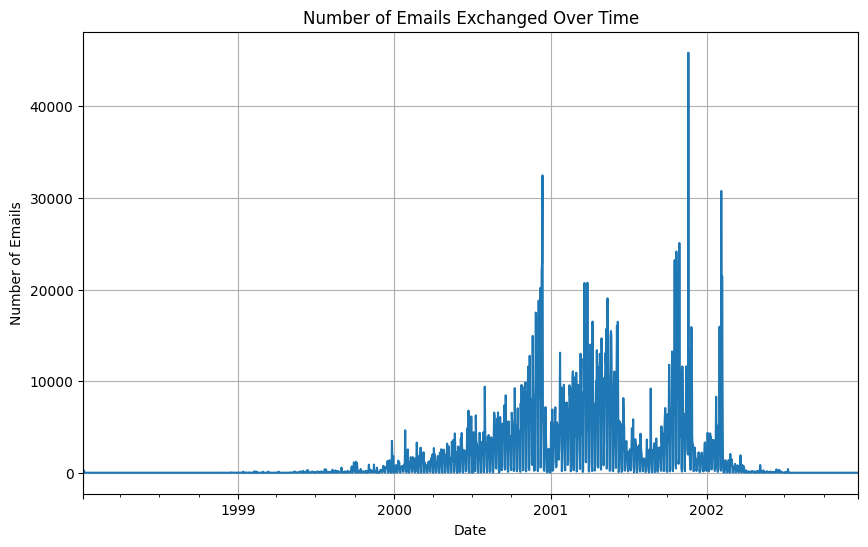

In [20]:
import matplotlib.pyplot as plt

emails_per_day = enron_emails.resample('D', on='Date_cleaned').size()

plt.figure(figsize=(10, 6))
emails_per_day.plot()
plt.title('Number of Emails Exchanged Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.grid()
plt.show()

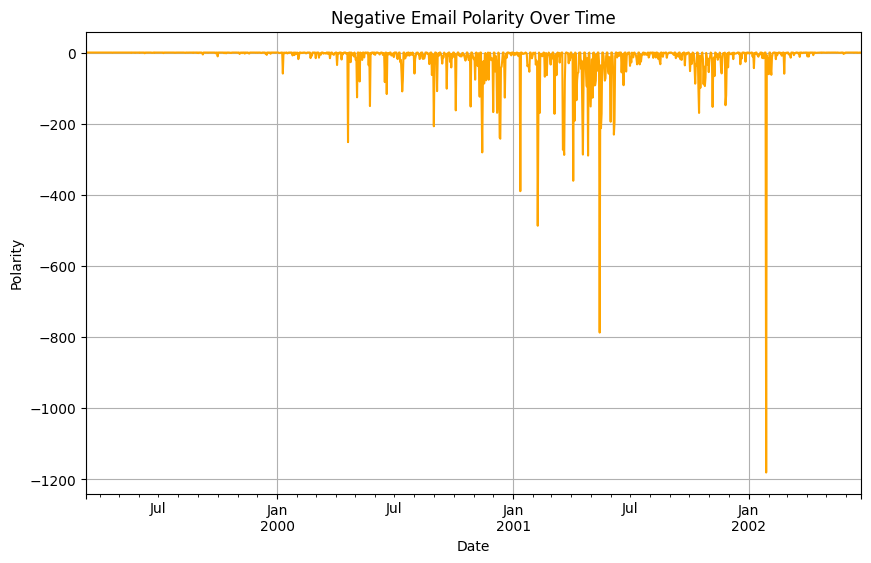

In [21]:
polarity_per_day = enron_emails[enron_emails['Polarity'] < -0.25].reset_index(drop = True).resample('D', on='Date_cleaned')['Polarity'].sum()

plt.figure(figsize=(10, 6))
polarity_per_day.plot(color='orange')
plt.title('Negative Email Polarity Over Time')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.grid()
plt.show()

***There is an overall trend of surge in negative polarity and there are noticable spikes towards the negative polarity during the crisis period.***

## Crafting features

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
from scipy.stats import entropy

def calculate_entropy(times):
    if len(times) <= 15:#sample size to be sufficient enough to properly estimate the entropy of interaction
        return 0
    times = np.array([t.timestamp() for t in times])#Convert to seconds
    intervals = np.diff(sorted(times))
    if intervals.sum() == 0:
        return 0
    return entropy(intervals / intervals.sum(), base=2)

def caculate_median_time_gap(times):
    if len(times) <= 1:
        return 0
    times = np.array([t.timestamp() for t in times])
    intervals = np.diff(sorted(times))
    return np.median(intervals)

holidays = [
    '1998-01-01',
    '1998-12-25',
    '1999-01-01',
    '1999-12-25',
    '2000-01-01',
    '2000-12-25',
    '2001-01-01',
    '2001-12-25',
    '2002-01-01',
    '2002-12-25',
    '2003-01-01',
    '2003-12-25'
]

work_start, work_end = 9, 18

enron_emails['is_weekend'] = enron_emails['Date_cleaned'].dt.dayofweek >= 5
enron_emails['is_work_hour'] = enron_emails['Date_cleaned'].dt.hour.between(work_start, work_end)
enron_emails['is_odd_hour'] = (~enron_emails['is_work_hour'])
enron_emails['is_holiday'] = enron_emails['Date_cleaned'].dt.strftime('%Y-%m-%d').isin(holidays)

features = enron_emails.groupby(['From', 'To']).apply(lambda group: pd.Series({
    'email_count': len(group),
    'median_time_gap': caculate_median_time_gap(group['Date_cleaned']),
    'unique_days_active': group['Date_cleaned'].dt.date.nunique(),
    'interaction_entropy': calculate_entropy(group['Date_cleaned']),
    'weekend_emails_count': group['is_weekend'].sum(),
    'work_hour_emails': group['is_work_hour'].sum(),
    'odd_time_emails': group['is_odd_hour'].sum(),
    'holiday_emails': group['is_holiday'].sum(),
    'total_pos_polarity': group[group['Polarity'] >= 0]['Polarity'].sum(),
    'total_neg_polarity': group[group['Polarity'] < 0]['Polarity'].sum(),
    'pos_polarity_variance': group[group['Polarity'] >= 0]['Polarity'].var(ddof=0),
    'neg_polarity_variance':group[group['Polarity'] < 0]['Polarity'].var(ddof=0),
    'hiding_keyword_count':group['hiding_keyword_count'].sum(),
    'urgent_keyword_count':group['urgent_keyword_count'].sum(),
    'fin_keyword_count':group['fin_keyword_count'].sum(),
    'question_count':group['question_count'].sum()
})).reset_index()

/tmp/ipykernel_24/188536137.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  features = enron_emails.groupby(['From', 'To']).apply(lambda group: pd.Series({


In [23]:
print(features.shape)
features.head()

(308873, 18)


,From,To,email_count,median_time_gap,unique_days_active,interaction_entropy,weekend_emails_count,work_hour_emails,odd_time_emails,holiday_emails,total_pos_polarity,total_neg_polarity,pos_polarity_variance,neg_polarity_variance,hiding_keyword_count,urgent_keyword_count,fin_keyword_count,question_count
0,'todd'.delahoussaye@enron.com,ajay.sharma@enron.com,5.0,44396.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,-0.327686,NaN,0.000275,0.0,0.0,9.0,10.0
1,'todd'.delahoussaye@enron.com,anne.bike@enron.com,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.062121,NaN,0.000000,0.0,0.0,1.0,10.0
2,'todd'.delahoussaye@enron.com,bianca.ornelas@enron.com,5.0,44396.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,-0.327686,NaN,0.000275,0.0,0.0,9.0,10.0
3,'todd'.delahoussaye@enron.com,brant.reves@enron.com,5.0,44396.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,-0.327686,NaN,0.000275,0.0,0.0,9.0,10.0
4,'todd'.delahoussaye@enron.com,c..gossett@enron.com,5.0,44396.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,-0.327686,NaN,0.000275,0.0,0.0,9.0,10.0


In [24]:
#the variances come NaN wherever there is no positive polarity email or negative polarity email
features = features.fillna(0)
features.isnull().sum()

From                     0
To                       0
email_count              0
median_time_gap          0
unique_days_active       0
interaction_entropy      0
weekend_emails_count     0
work_hour_emails         0
odd_time_emails          0
holiday_emails           0
total_pos_polarity       0
total_neg_polarity       0
pos_polarity_variance    0
neg_polarity_variance    0
hiding_keyword_count     0
urgent_keyword_count     0
fin_keyword_count        0
question_count           0
dtype: int64

In [25]:
features.to_csv('./enron_emails_features.csv', index = False)